In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
%matplotlib inline

In [2]:
#importing data files
confirmed_cases_path = 'C:/SDSU/BDA/Midterm_Exam/covid-19/covid-19/covid_confirmed_usafacts.csv'
confirmed_deaths_path = 'C:/SDSU/BDA/Midterm_Exam/covid-19/covid-19/covid_deaths_usafacts.csv'
county_poppulation_path = 'C:/SDSU/BDA/Midterm_Exam/covid-19/covid-19/covid_county_population_usafacts.csv'
name_text_file_path = 'C:/SDSU/BDA/Midterm_Exam/names/*.txt'
confirmed_cases_df = pd.read_csv(confirmed_cases_path)
confirmed_deaths_df = pd.read_csv(confirmed_deaths_path)
county_population = pd.read_csv(county_poppulation_path)
county_population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


# Covid - 19

# Question 1
Compute the total confirmed cases per day in the country. Produce a table and a line plot?

First we define a function to find columnwise sum for all dates by removing the non-date columns from data frame and doing sum of each column

In [3]:
def remove_col_and_sum(df,remove_headers):
    all_headers = list(df.columns)
    final_headers = list(set(all_headers) - set(remove_headers))
    return df[final_headers].sum(axis = 0,skipna = True)
#converting series to data frame and remaing columns and converting date colum to DateTime to sort
def cases_per_day(confirmed_cases_df):
    remove_headers = ['countyFIPS','County Name','State','stateFIPS']
    confirmed_cases_per_day = remove_col_and_sum(confirmed_cases_df,remove_headers)
    confirmed_cases_per_day = pd.DataFrame(confirmed_cases_per_day)
    confirmed_cases_per_day.index = confirmed_cases_per_day.index.rename("Date")
    confirmed_cases_per_day = confirmed_cases_per_day.rename(columns={0: "Cases_per_day"})
    confirmed_cases_per_day = confirmed_cases_per_day.reset_index()
    confirmed_cases_per_day.Date = pd.to_datetime(confirmed_cases_per_day.Date)
    confirmed_cases_per_day = confirmed_cases_per_day.sort_values('Date', ascending = True)
    return confirmed_cases_per_day
    

In [4]:
confirmed_cases_per_day = cases_per_day(confirmed_cases_df)
confirmed_cases_per_day.tail(10)

,Date,Cases_per_day
57,2020-03-28,122608
71,2020-03-29,141409
44,2020-03-30,163487
40,2020-03-31,186517
32,2020-04-01,212915
58,2020-04-02,241643
65,2020-04-03,276889
50,2020-04-04,310597
70,2020-04-05,335338
0,2020-04-06,365115


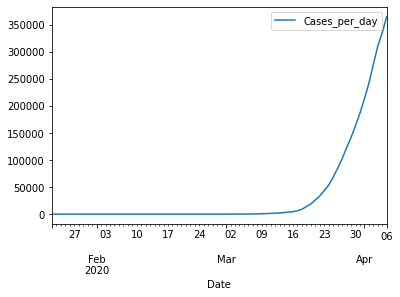

In [5]:
confirmed_cases_per_day.plot.line(x = 'Date', y = 'Cases_per_day')

From the table of results and graph we see that number of confirmed COVID-19 cases per day are increasing exponentially in USA 

## Question 2 
Compute the total confirmed cases per week in the country. Produce a table of results. Plot
the results using a log line plot. That is the log of the number of cases. A log plot of an exponential process will produce a straight line. Does the resulting plot look like an exponential?

Assumtion : I have defined a week starting wednesday(first day) to next wednedsay. Since the last day of dataset is a monday last week (week 12) is not considered as it is incomplete

Defined a function to find number of cases per week. The function first takes the week number of current calendar year which is 4 to strat and subracts 3 from each week to get the covid-19 week. The we filter the data from for numbers each wednesnay

In [6]:
def cases_per_week(confirmed_cases_df):
    confirmed_cases_per_week = cases_per_day(confirmed_cases_df)
    confirmed_cases_per_week['Week'] = confirmed_cases_per_week.Date.dt.week
    confirmed_cases_per_week['Week'] = confirmed_cases_per_week["Week"] - 3
    confirmed_cases_per_week['day_of_week'] = confirmed_cases_per_week.Date.dt.day_name()
    confirmed_cases_per_week = confirmed_cases_per_week[confirmed_cases_per_week['day_of_week'] == 'Wednesday'] 
    return confirmed_cases_per_week

In [7]:
cases_per_week_df = cases_per_week(confirmed_cases_df)
cases_per_week_df

,Date,Cases_per_day,Week,day_of_week
35,2020-01-22,1,1,Wednesday
46,2020-01-29,5,2,Wednesday
64,2020-02-05,11,3,Wednesday
41,2020-02-12,12,4,Wednesday
43,2020-02-19,13,5,Wednesday
68,2020-02-26,15,6,Wednesday
8,2020-03-04,103,7,Wednesday
53,2020-03-11,1325,8,Wednesday
30,2020-03-18,8997,9,Wednesday
42,2020-03-25,68244,10,Wednesday


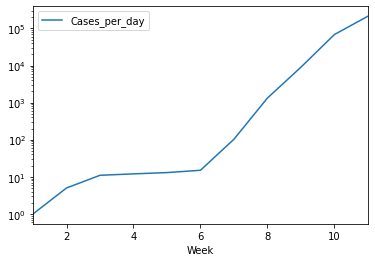

In [8]:
cases_per_week_df.plot.line(x='Week', y = 'Cases_per_day', logy = True)

The Log plot of the result for number of cases per week is a straight line that means number of cases are increasing exponentially in USA.

The resulting graph after taking log of number of cases per week is not an exponential curve 

## Question 3
Compute the number of new confirmed cases per week in the the country. Produce a table
of results

In [9]:
def new_cases_week(confirmed_cases_df):
    new_cases_week = cases_per_week(confirmed_cases_df)
    first_week = new_cases_week[new_cases_week.Week == 1]
    first_week['New_cases'] = first_week.iloc[:,1]
    new_cases_week['New_cases'] = new_cases_week.Cases_per_day.diff(periods = 1)
    new_cases_week = new_cases_week.dropna()
    new_cases_week = first_week.append(new_cases_week)
    return new_cases_week

In [10]:
new_cases_per_week_df = new_cases_week(confirmed_cases_df)
new_cases_per_week_df

C:\Users\nadee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Cases_per_day,Week,day_of_week,New_cases
35,2020-01-22,1,1,Wednesday,1.0
46,2020-01-29,5,2,Wednesday,4.0
64,2020-02-05,11,3,Wednesday,6.0
41,2020-02-12,12,4,Wednesday,1.0
43,2020-02-19,13,5,Wednesday,1.0
68,2020-02-26,15,6,Wednesday,2.0
8,2020-03-04,103,7,Wednesday,88.0
53,2020-03-11,1325,8,Wednesday,1222.0
30,2020-03-18,8997,9,Wednesday,7672.0
42,2020-03-25,68244,10,Wednesday,59247.0


The resulting table of results for new cases per week shows that new cases of covid-19 are increasing exponentially in USA

## Question 4

Using the same function to find deaths per week as for confirmed cases per week, since the last day of dataset is a monday last week (week 12) is not considered as it is incomplete

In [11]:
confirmed_deaths_df = confirmed_deaths_df[confirmed_deaths_df['County Name'] != 'Statewide Unallocated']
deaths_per_week = cases_per_week(confirmed_deaths_df)
deaths_per_week = deaths_per_week.rename(columns = {'Cases_per_day':'Deaths'})
deaths_per_week

,Date,Deaths,Week,day_of_week
35,2020-01-22,0.0,1,Wednesday
46,2020-01-29,0.0,2,Wednesday
64,2020-02-05,0.0,3,Wednesday
41,2020-02-12,0.0,4,Wednesday
43,2020-02-19,0.0,5,Wednesday
68,2020-02-26,0.0,6,Wednesday
8,2020-03-04,11.0,7,Wednesday
53,2020-03-11,37.0,8,Wednesday
30,2020-03-18,142.0,9,Wednesday
42,2020-03-25,951.0,10,Wednesday


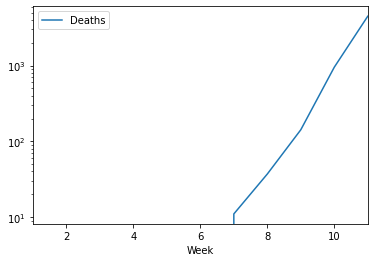

In [12]:
deaths_per_week.plot.line(x='Week', y = 'Deaths', logy = True)

The resulting table and plot shows that deaths due to covid-19 in USA started in week 7 from the first confirmed cases of virus and then is increasing exponentiallys as the log plot for number of deaths is a straight line

## Question 5

Find the 10 counties with the most known number of covid-19 cases. Plot the number of
cases each week. What are the differences or similarities?

In [13]:
county = confirmed_cases_df.iloc[:,np.r_[0,1,-1]]
top_10 = county.sort_values(by = county.columns[-1], ascending = False ).head(10)
county_names = list(top_10['County Name'])
county_names

['Queens County',
 'Kings County',
 'Nassau County',
 'Bronx County',
 'Westchester County',
 'Suffolk County',
 'New York County',
 'Cook County',
 'Wayne County',
 'Bergen County']

In [14]:
Queens_county = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Queens County']
Queens_county = cases_per_week(Queens_county)
Queens_county = Queens_county.rename(columns = {"Cases_per_day" : "Queens_county"})
top_10_county_df = Queens_county[["Week","Queens_county"]]

Kings_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Kings County']
Kings_County = cases_per_week(Kings_County)
Kings_County = Kings_County.rename(columns = {"Cases_per_day" : "Kings_County"})
top_10_county_df['Kings_County'] = Kings_County["Kings_County"]

Nassau_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Nassau County']
Nassau_County = cases_per_week(Nassau_County)
Nassau_County = Nassau_County.rename(columns = {"Cases_per_day" : "Nassau_County"})
top_10_county_df['Nassau_County'] = Nassau_County["Nassau_County"]

Bronx_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Bronx County']
Bronx_County = cases_per_week(Bronx_County)
Bronx_County = Bronx_County.rename(columns = {"Cases_per_day" : "Bronx_County"})
top_10_county_df['Bronx_County'] = Bronx_County["Bronx_County"]

Westchester_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Westchester County']
Westchester_County = cases_per_week(Westchester_County)
Westchester_County = Westchester_County.rename(columns = {"Cases_per_day" : "Westchester_County"})
top_10_county_df['Westchester_County'] = Westchester_County["Westchester_County"]

Suffolk_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Suffolk County']
Suffolk_County = cases_per_week(Suffolk_County)
Suffolk_County = Suffolk_County.rename(columns = {"Cases_per_day" : "Suffolk_County"})
top_10_county_df['Suffolk_County'] = Suffolk_County["Suffolk_County"]

New_York_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'New York County']
New_York_County = cases_per_week(New_York_County)
New_York_County = New_York_County.rename(columns = {"Cases_per_day" : "New_York_County"})
top_10_county_df['New_York_County'] = New_York_County["New_York_County"]

Cook_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Cook County']
Cook_County = cases_per_week(Cook_County)
Cook_County = Cook_County.rename(columns = {"Cases_per_day" : "Cook_County"})
top_10_county_df['Cook_County'] = Cook_County["Cook_County"]

Wayne_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Wayne County']
Wayne_County = cases_per_week(Wayne_County)
Wayne_County = Wayne_County.rename(columns = {"Cases_per_day" : "Wayne_County"})
top_10_county_df['Wayne_County'] = Wayne_County["Wayne_County"]

Bergen_County = confirmed_cases_df[confirmed_cases_df['County Name'] == 'Bergen County']
Bergen_County = cases_per_week(Bergen_County)
Bergen_County = Bergen_County.rename(columns = {"Cases_per_day" : "Bergen_County"})
top_10_county_df['Bergen_County'] = Bergen_County["Bergen_County"]

top_10_county_df.index = top_10_county_df.Week
top_10_county_df = top_10_county_df.drop(columns = 'Week')
top_10_county_df

C:\Users\nadee\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Queens_county,Kings_County,Nassau_County,Bronx_County,Westchester_County,Suffolk_County,New_York_County,Cook_County,Wayne_County,Bergen_County
Week,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,2,0,0
4,0,0,0,0,0,1,0,2,0,0
5,0,0,0,0,0,1,0,2,0,0
6,0,0,0,0,0,1,0,2,0,0
7,0,0,0,0,10,1,1,4,0,0
8,4,14,29,3,121,25,18,22,2,7
9,533,505,184,303,538,167,590,178,25,114


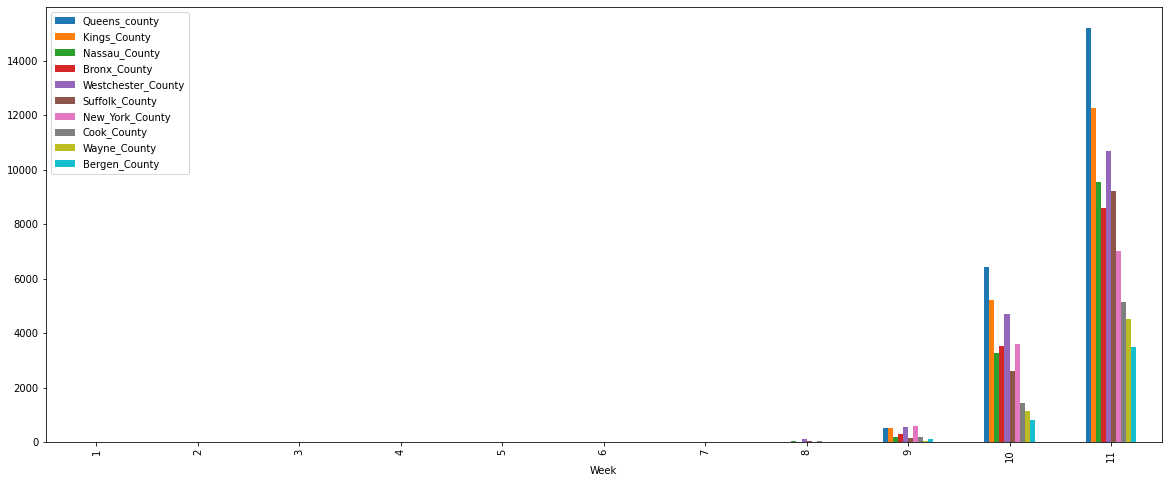

In [15]:
top_10_county_df.plot.bar(figsize=(20,8),y=['Queens_county','Kings_County','Nassau_County','Bronx_County','Westchester_County','Suffolk_County','New_York_County','Cook_County','Wayne_County','Bergen_County'])

The 10 couties with most confirmed covid-19 cases are Queens County,Kings County,Nassau County,Bronx County,Westchester County,Suffolk County,New York County,Cook County,Wayne County,Bergen County

The trend of number of cases per week in top 10 counties are quite similar and it shows that covid-19 cases were started to be reported in them around week 8 and has been exponentially increasing since then. We can see that no cases were reported in these counties for first 6-7 cases but as soon as it started in week 7 they became hotspots and counties with most cases in week 11

We can also see that number of confirmed cases in top 2 counties (Queens and Kings) are alomost three times more that that of last 2 counites in top 10 (Bergen and Wayne)


## Question 6

We find the totoal number of confirmed cases in each couty from the number of cases in each county on last day of data set.
We remove the state wide unallocated data for that state as it is incosistent with somtimes decreasing number of cases from one day to another
Merged population data with confirmed cases data and found cases per population in each county

In [16]:
county_population = county_population[county_population.population > 0 ]
final_cases_count = confirmed_cases_df.iloc[:,np.r_[0,1,-1]]
final_cases_count = final_cases_count[final_cases_count.iloc[:,-1] >0 ]
final_cases_count = final_cases_count[final_cases_count['County Name'] != 'Statewide Unallocated']
county_cases_per_population = pd.merge(final_cases_count, 
                            county_population[['countyFIPS','population']],
                            on ='countyFIPS')
county_cases_per_population['cases_per_population'] = county_cases_per_population.iloc[:,-2]/county_cases_per_population.population
county_cases_per_population[['County Name','cases_per_population']]

,County Name,cases_per_population
0,Autauga County,0.000215
1,Baldwin County,0.000170
2,Barbour County,0.000122
3,Bibb County,0.000313
4,Blount County,0.000173
...,...,...
2456,Sublette County,0.000102
2457,Sweetwater County,0.000118
2458,Teton County,0.001705
2459,Uinta County,0.000148


In [17]:
top_10_county = county_cases_per_population.sort_values('cases_per_population', ascending = False).head(10)
top_10_county[['County Name','cases_per_population']]

,County Name,cases_per_population
502,Blaine County,0.018375
1474,Rockland County,0.017505
1490,Westchester County,0.014774
937,Orleans Parish,0.011701
1460,Nassau County,0.011508
1471,Queens County,0.010264
1433,Bronx County,0.010102
1473,Richmond County,0.009617
1482,Suffolk County,0.009134
1466,Orange County,0.008825


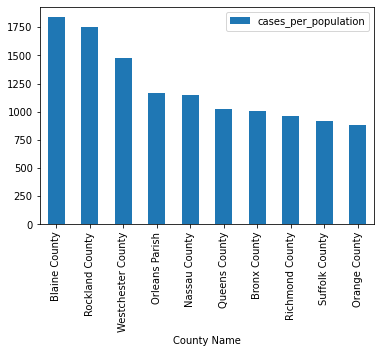

In [18]:
top_10_county['cases_per_population'] = top_10_county['cases_per_population']*100000
top_10_county.plot.bar(x = 'County Name' , y = 'cases_per_population')

We can see above the 10 counties with most cases per 100,000 population.
Blaine county has highest with more than 1800 cases per 100,000 population

In [19]:
least_10_county = county_cases_per_population.sort_values('cases_per_population', ascending = True).head(10)
least_10_county[['County Name','cases_per_population']]

,County Name,cases_per_population
2076,Henderson County,0.000012
1674,Scioto County,0.000013
966,Aroostook County,0.000015
205,Tehama County,0.000015
862,Laurel County,0.000016
887,Pike County,0.000017
2010,Anderson County,0.000017
852,Hardin County,0.000018
207,Tuolumne County,0.000018
1716,Le Flore County,0.000020


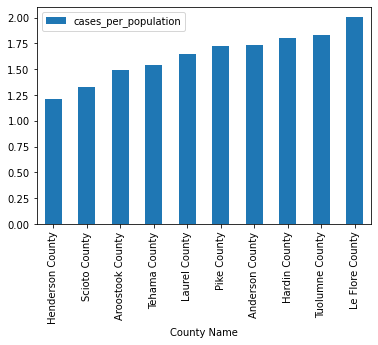

In [20]:
least_10_county['cases_per_population'] = least_10_county['cases_per_population']*100000
least_10_county.plot.bar(x = 'County Name' , y = 'cases_per_population')

We can see above the 10 counties with least cases per 100,000 population.
Henderson county has least with less than 1.2 cases per 100,000 population

## Question 7
Compute the death rate (deaths/ known cases) in each county that have both deaths and
known cases. Compute the mean and standard deviation of the results?

In [21]:
confirmed_deaths = confirmed_deaths_df.iloc[:,np.r_[0,1,-1]]
confirmed_deaths = confirmed_deaths[confirmed_deaths.iloc[:,-1] > 0 ]
confirmed_deaths.rename(columns={'4/6/2020': 'Total_Deaths'}, inplace=True)
county_deaths_per_cases = pd.merge(county_cases_per_population,confirmed_deaths[['countyFIPS','Total_Deaths']],on ='countyFIPS')
county_deaths_per_cases.rename(columns={'4/6/2020': 'Cases'}, inplace=True)
county_deaths_per_cases['Death_Rate'] = county_deaths_per_cases['Total_Deaths']/county_deaths_per_cases['Cases']
county_deaths_per_cases[['County Name','Death_Rate']]

,County Name,Death_Rate
0,Chambers County,0.052083
1,Etowah County,0.047619
2,Jackson County,0.058824
3,Jefferson County,0.011416
4,Lauderdale County,0.062500
...,...,...
760,Sheboygan County,0.047619
761,Washington County,0.052632
762,Waukesha County,0.025000
763,Waupaca County,0.500000


In [22]:
print("Mean Death Rate : " + str(county_deaths_per_cases.Death_Rate.mean())) 
print("Mean Standard Deviation for Death Rate : " + str(county_deaths_per_cases.Death_Rate.std()))

Mean Death Rate : 0.07978306922949359
Mean Standard Deviation for Death Rate : 0.1331546845184295


We can see that mean for death rate in USA counties is 0.079 and it is deviating by 0.13 throughout the population

## Question 8
Produce a violin plot of the death rates found in #7?

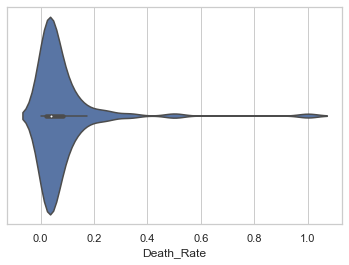

In [23]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=county_deaths_per_cases['Death_Rate'])

The violin plot shows that death rate in most of the counties is less than 0.2

## Question 9
There is some hope that covid-19 may have peaked in NYC (counties Bronx, Kings, New
York, Queens and Richmond). Is there any evidence of that in the data?

In [24]:
nyc_counties_df = confirmed_cases_df[confirmed_cases_df['State'] == 'NY']
nyc_counties_df =  nyc_counties_df[(nyc_counties_df['County Name'] == 'Bronx County') |
          (nyc_counties_df['County Name'] == 'Kings County') | 
          (nyc_counties_df['County Name'] == 'New York County') | 
          (nyc_counties_df['County Name']== 'Queens County') | 
          (nyc_counties_df['County Name'] == 'Richmond County')]
#nyc_counties_df
remove_headers = ['countyFIPS','County Name','State','stateFIPS']
all_headers = list(confirmed_cases_df.columns)
final_headers = list(set(all_headers) - set(remove_headers))
nyc_counties_df = nyc_counties_df[final_headers].sum(axis = 0, skipna = True)
# nyc_counties_df
nyc_counties_df.index = pd.to_datetime(nyc_counties_df.index)
nyc_counties_df = nyc_counties_df.sort_index(ascending = True)
nyc_counties_df = nyc_counties_df.diff()
nyc_counties_df = nyc_counties_df.dropna()
nyc_counties_df

2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
2020-01-27       0.0
               ...  
2020-04-02    4000.0
2020-04-03    8143.0
2020-04-04    5491.0
2020-04-05    4245.0
2020-04-06    4630.0
Length: 75, dtype: float64

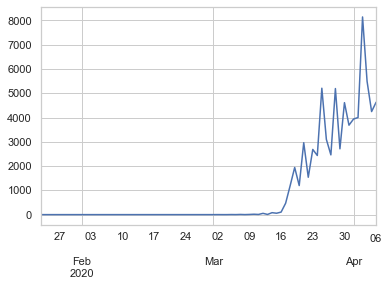

In [25]:
nyc_counties_df.plot.line()

The results for number of new cases in all of NYC counties show that it had a peak of 8143 cases on 3rd April and the trend for next three days is around half of that, so there is evidence that covid-19 has peaked in NYC and is on a downward trend

## Question 10
Seattle (King county in Washington) also hopes that they have peaked. Is there any evidence of that in the data?

In [26]:
seatle_df = confirmed_cases_df[confirmed_cases_df['State'] == 'WA']
seatle_df =  seatle_df[(seatle_df['County Name'] == 'King County')]
seatle_cases = seatle_df[final_headers].sum(axis = 0, skipna = True)
seatle_cases.index = pd.to_datetime(seatle_cases.index)
seatle_cases = seatle_cases.sort_index(ascending = True)
seatle_cases = seatle_cases.diff()
seatle_cases = seatle_cases.dropna()
seatle_cases

2020-01-23      0.0
2020-01-24      0.0
2020-01-25      0.0
2020-01-26      0.0
2020-01-27      0.0
              ...  
2020-04-02    160.0
2020-04-03     55.0
2020-04-04    154.0
2020-04-05    293.0
2020-04-06    137.0
Length: 75, dtype: float64

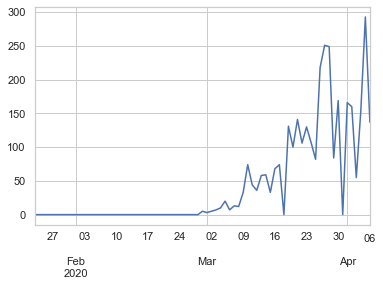

In [27]:
seatle_cases.plot.line()

The results for number of new cases in Seatle show that it had most number of cases reported on 5th april but there is only one day of data after that with lower cases and the plot shows ups and downs for last 20 days , so there is no evidence for a peak of covid-19 in seatle county data 

# Part 2 : Names 

## Question 1

Combine the files into one dataframe that contains year, name, sex and number of people
born that year. Create a training set and a test set from this dataframe?

Note : I have run this code on windows machine and to get the year value for data frame I used split function on the Text file names. For Windows machine I used '//' to split, for a Linux(Mac) machine it might be needed to use '/'. I have put it as a comment on the next like
For Mac machine pls comment the split with '//' and use commented line of code with '/'


In [28]:
text_file_names = glob.glob(name_text_file_path)
column_names = ["Name", "Sex","Count","Year"]
names_df = pd.DataFrame(columns = column_names)
for name in text_file_names:
    year = name.split('\\')[1][3:7]
    #year = name.split('/')[1][3:7]
    data = pd.read_csv(name, sep=",", header=None)
    data.columns = ["Name", "Sex","Count"]
    data["Year"] = year
    names_df = names_df.append(data)


In [29]:
names_df.sort_values(by=['Year'], inplace=True, ascending=True)
print(names_df.shape)
names_df.head()

(1957046, 4)


,Name,Sex,Count,Year
0,Mary,F,7065,1880
1341,Vern,M,19,1880
1340,Stewart,M,19,1880
1339,Randolph,M,19,1880
1338,Lucien,M,19,1880


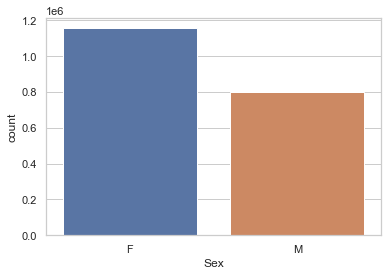

In [30]:
sns.countplot(names_df.Sex)

We see that overall in that dataset count of Females names is higher than males
Splitting the data set into train and test set and checking their shapes

In [31]:
train_set, test_set = train_test_split(names_df,test_size=0.2)
print(train_set.shape)
print(test_set.shape)

(1565636, 4)
(391410, 4)


In [32]:
train_set.head()

,Name,Sex,Count,Year
616,Latricia,F,253,1974
8084,Melburn,M,12,1927
2573,Brice,M,7,1894
16541,Nattalee,F,6,2006
24557,In,M,5,1992


In [33]:
test_set.head()

,Name,Sex,Count,Year
14514,Sol,M,22,1980
21143,Nhan,M,10,1992
11412,Jacqui,F,8,2001
5595,Wynne,F,5,1927
11389,Cory,M,4258,1977


## Question 2 
For the first model determine for each name which sex used the name most in the training
data. How good is the model on the test set? How to measure good?


Applying groupby on training set to find count of occurences of each name in the data set

In [34]:
train_set_group = train_set.groupby(['Name', 'Sex'], as_index = False)['Count'].sum()
print(train_set_group.shape)
train_set_group.head()

(104010, 3)


,Name,Sex,Count
0,Aaban,M,70
1,Aabha,F,28
2,Aabid,M,11
3,Aabidah,F,5
4,Aabir,M,10


In [35]:
train_set_group.loc[train_set_group['Name'] == "Sam"]

,Name,Sex,Count
82908,Sam,F,1151
82909,Sam,M,108261


Creating training set of names with number of times it was given to males and Females 

In [36]:
train_male_female_count = train_set_group.pivot('Name', 'Sex', 'Count')
print(train_male_female_count.shape)
train_male_female_count.head()

(93767, 2)


Sex,F,M
Name,,
Aaban,NaN,70.0
Aabha,28.0,NaN
Aabid,NaN,11.0
Aabidah,5.0,NaN
Aabir,NaN,10.0


In [37]:
train_male_female_count.loc[train_male_female_count.index == "Sam"]

Sex,F,M
Name,,
Sam,1151.0,108261.0


In [38]:
train_male_female_count.loc[(train_male_female_count.F == train_male_female_count.M)]

Sex,F,M
Name,,
Ajae,11.0,11.0
Akie,5.0,5.0
Alique,5.0,5.0
Ammer,5.0,5.0
Anesti,5.0,5.0
...,...,...
Verlynn,5.0,5.0
Vero,5.0,5.0
Wilmeth,5.0,5.0


## Model
Model to predict gender based on count of number of times a name was given to male or female.
Since the data set contains more females than males this model will default predicted gender to Female in case count is equal

In [39]:
def predict_sex_model(train_male_female_count):
    return np.where(train_male_female_count['M'] > train_male_female_count['F'], 'M', 'F')

In [40]:
train_male_female_count = train_male_female_count.fillna(0)
train_male_female_count=train_male_female_count.reset_index()
train_male_female_count['Predicted Gender'] = predict_sex_model(train_male_female_count)
print(train_male_female_count.shape)
train_male_female_count.head()

(93767, 4)


Sex,Name,F,M,Predicted Gender
0,Aaban,0.0,70.0,M
1,Aabha,28.0,0.0,F
2,Aabid,0.0,11.0,M
3,Aabidah,5.0,0.0,F
4,Aabir,0.0,10.0,M


In [41]:
train_male_female_count.loc[train_male_female_count.Name == "Sam"]

Sex,Name,F,M,Predicted Gender
74519,Sam,1151.0,108261.0,M


## Test 
Testing the Model using Test data

In [42]:
test_set = test_set[['Name','Sex']]
test_set = test_set.reset_index(drop=True)
print(test_set.shape)
test_set.head()

(391410, 2)


,Name,Sex
0,Sol,M
1,Nhan,M
2,Jacqui,F
3,Wynne,F
4,Cory,M


In [43]:
test_set = test_set.merge(train_male_female_count[['Name','Predicted Gender']], on='Name', how='left')
test_set = test_set[['Name','Sex','Predicted Gender']]
print(test_set.shape)
test_set.head()

(391410, 3)


,Name,Sex,Predicted Gender
0,Sol,M,M
1,Nhan,M,M
2,Jacqui,F,F
3,Wynne,F,F
4,Cory,M,M


In [44]:
predicted_difference = test_set.loc[test_set['Sex'] != test_set['Predicted Gender']]
print(predicted_difference.shape)
predicted_difference.head()

(43863, 3)


,Name,Sex,Predicted Gender
50,Kellie,M,F
51,Elon,F,M
61,Knightly,F,M
62,Mischa,M,F
68,Norris,F,M


In [45]:
predicted_correct = test_set.loc[test_set['Sex'] == test_set['Predicted Gender']]
print(predicted_correct.shape)
predicted_correct.shape
# predicted_correct.head()

(347547, 3)


(347547, 3)

In [46]:
len(predicted_correct.index)

347547

## Metrics
Checking the accuracy score of Model on Test Data

In [47]:
Accuracy_Score = len(predicted_correct.index)/(len(predicted_correct.index)+ len(predicted_difference.index))
print('Accuracy Score : ')
print(Accuracy_Score)

Accuracy Score : 
0.8879359239671956


In [48]:
true_positive = test_set.loc[(test_set['Sex'] == "M") & (test_set['Predicted Gender']=="M")]
print(true_positive.shape)
TP = len(true_positive.index)
print(TP)
true_negative = test_set.loc[(test_set['Sex'] == "F") & (test_set['Predicted Gender']=="F")] 
print(true_negative.shape)
TN = len(true_negative.index)
print(TN)
false_positive = test_set.loc[(test_set['Sex'] == "M") & (test_set['Predicted Gender']=="F")] 
print(false_positive.shape)
FP = len(false_positive.index)
print(FP)
false_negative = test_set.loc[(test_set['Sex'] == "F") & (test_set['Predicted Gender']=="M")] 
print(false_negative.shape)
FN = len(false_negative.index)
print(FN)
print("Recall Score : " )
Recall = TP/(TP+FN)
print(Recall)

(139123, 3)
139123
(208424, 3)
208424
(19076, 3)
19076
(19626, 3)
19626
Recall Score : 
0.8763708747771639


In [49]:
Precision = TP/(TP+FP)
print("Precision Score : " )
print(Precision)

Precision Score : 
0.8794176954342315


In [50]:
missc_classification_rate = (FP+FN)/(FP+FN+TP+TN)
print("Miscellaneous classification Score : " )
print(missc_classification_rate)

Miscellaneous classification Score : 
0.1001996121672807


In [51]:
f1_Score = 2*Precision*Recall/(Precision+Recall)
print("F1 Score : " )
print(f1_Score)

F1 Score : 
0.8778916415311029


How to measure good and How good is this model on test set?(The Below Numbers change on each run based on test and train split)

We measure the model based on below metrics:

Accuracy is proportion of total no. of predictions that were correct, this simple model predicts gender of a name based on most number of time it was given to a gender from 1880 to 2018 .

Accuracy Score for this model = 0.8879359239671956


Recall is proportion of actual positive cases that were correctly classified.

Recall Score for this model : 0.8763708747771639

Precision is proportion of total positive cases that were correct

Precision Score for this model : 0.8794176954342315

F1-score tells how precise our classifier is as well as how robust the model is.

F1 Score for this model : 0.8778916415311029


## Question 3

For the second model create a decision tree using the training data. How good is the model
on the test set?

In [52]:
label_encoder = LabelEncoder()
decision_tree_df = names_df.copy()
decision_tree_df["Name"] = label_encoder.fit_transform(decision_tree_df["Name"].astype('str'))
decision_tree_df["Sex"] = label_encoder.fit_transform(decision_tree_df["Sex"].astype('str'))
decision_tree_df.head()

,Name,Sex,Count,Year
0,61717,0,7065,1880
1341,92800,1,19,1880
1340,84611,1,19,1880
1339,73758,1,19,1880
1338,57713,1,19,1880


In [53]:
train_set_2, test_set_2 = train_test_split(decision_tree_df,test_size=0.2)
train_x = train_set_2[["Name","Count","Year"]]
test_x = test_set_2[["Name","Count","Year"]]
train_y = train_set_2[["Sex"]]
test_y = test_set_2[["Sex"]]

In [54]:
decision_tree_clf = DecisionTreeClassifier(random_state=0)
decision_tree_clf = decision_tree_clf.fit(train_x, train_y)

In [55]:
prediction = decision_tree_clf.predict(test_x)

In [56]:
print(classification_report(test_y,prediction))
print("Accuracy score : ")
print(accuracy_score(test_y,prediction))
recall = recall_score(test_y,prediction)
print("Recall score : ")
print(recall)
precision = precision_score(test_y,prediction)
print("precision score : ")
print(precision)
f1 = f1_score(test_y,prediction)
print("f1 score : ")
print(f1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    231732
           1       0.92      0.93      0.93    159678

    accuracy                           0.94    391410
   macro avg       0.94      0.94      0.94    391410
weighted avg       0.94      0.94      0.94    391410

Accuracy score : 
0.9387981911550548
Recall score : 
0.9252307769385889
precision score : 
0.9247848267659854
f1 score : 
0.9250077481036713


How good is this model on test set?(Below numbers change on every run based on train and test data split)

We measure the model based on below metrics:

Accuracy is proportion of total no. of predictions that were correct, this simple model predicts gender of a name based on most decision tree algorith. 

Accuracy Score for this model = 0.9387981911550548

Recall is proportion of actual positive cases that were correctly classified. 

Recall Score for this model : 0.9252307769385889

Precision is proportion of total positive cases that were correct 

Precision Score for this model : 0.9247848267659854

F1-score tells how precise our classifier is as well as how robust the model is.

F1 Score for this model : 0.9250077481036713

## Question 4
How do the two models compare?

The First model predicts the gender of the name based on fact how many times this name was given to male or female in the training set.

This model fails when the name is not in the training set but is present in test set.
Also for the first model I decided to default to feamle when the count given to male and feamle for a name is equal. since overall count of females in data set is more than males defaulting to female when count is equal gave a better accuracy then defaulting to male.

The Second model takes year into account and classifies the gender based on Name and count given to that name in a particular year, so the second model creates a sequence of branching operations baes on Name, Count and Year.

We can deduce that by taking year wise name and count decision tree model was more accurate(93.8%) than first model(88%) which only took into account number of times name was given to a male of female.

The recall score of decision tree model is also more (92%) as compared to first model(87%) which shows decision tree model has ability to find more positive samples as compared to first model.
The Recall score shows ability to fiad  all relevant instances of males and females in dataset 

The prcision score of seconds model (92%) is also higher than first model (87%)

The seconds model also has better f1 score which is harmonic mean of Precision and Recall

Based on all the available metrics we can say decision tree model is better at predicting gender of a name

